<a href="https://colab.research.google.com/github/rakesh-choudhury/dump/blob/master/ADM_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
youtube = pd.read_csv("/content/drive/My Drive/Datasets/Final_YouTube_Dataset/YouTube.csv")

youtube['trending_date'] = pd.to_datetime(youtube['trending_date'], format='%y.%d.%m') #parsing
#youtube['publish_time'] = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
# youtube['category_id'] = youtube['category_id'].astype(str)

youtube.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,Country,Category,like_percentage,popular,tags_clean,sent_score
0,0,0,0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Cannada,Music_videos,94.773995,1,Eminem Walk On Water Aftermath Shady Interscop...,0.0
1,1,1,1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,Cannada,Pranks,98.696344,0,plush bad unboxing unboxing fan mail idubbbztv...,0.5
2,2,2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Cannada,Pranks,96.472974,1,racist superman rudy mancuso king bach racist ...,-0.6
3,3,3,3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Cannada,Youtube_Celebrities,98.518193,1,ryan higa higatv nigahiga i dare you idy rhpc ...,-0.3
4,4,4,4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,Cannada,Music_videos,98.726326,1,edsheeran ed sheeran acoustic live cover offic...,0.0


In [0]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241120 entries, 0 to 241119
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              241120 non-null  int64         
 1   video_id                241120 non-null  object        
 2   trending_date           241120 non-null  datetime64[ns]
 3   title                   241120 non-null  object        
 4   channel_title           241120 non-null  object        
 5   category_id             241120 non-null  float64       
 6   publish_time            241120 non-null  object        
 7   tags                    241120 non-null  object        
 8   views                   241120 non-null  float64       
 9   likes                   241120 non-null  float64       
 10  dislikes                241120 non-null  float64       
 11  comment_count           241120 non-null  float64       
 12  thumbnail_link          241120

In [0]:
youtube.describe()

,Unnamed: 0,category_id,views,likes,dislikes,comment_count,like_percentage,popular,ldratio,perc_comment,perc_reaction
count,241120.000000,241120.000000,2.411200e+05,2.411200e+05,2.411200e+05,2.411200e+05,237785.000000,241120.000000,2.377850e+05,241120.000000,241120.000000
mean,120559.500000,20.536517,1.001629e+06,3.305565e+04,1.739136e+03,3.790004e+03,91.786679,0.116875,inf,0.005304,0.038143
std,69605.492791,7.011738,3.905663e+06,1.344295e+05,1.803380e+04,2.179316e+04,10.643798,0.321272,NaN,0.009414,0.036898
min,0.000000,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,60279.750000,20.000000,5.291575e+04,8.150000e+02,4.900000e+01,1.140000e+02,89.947664,0.000000,8.947937e+00,0.001129,0.009628
50%,120559.500000,24.000000,2.126895e+05,4.195000e+03,2.100000e+02,5.295000e+02,95.685456,0.000000,2.217742e+01,0.002845,0.026233
75%,180839.250000,24.000000,7.045270e+05,1.898750e+04,7.760000e+02,2.016000e+03,98.042056,0.000000,5.007400e+01,0.006166,0.056331
max,241119.000000,44.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,100.000000,1.000000,inf,0.526156,0.495928


In [0]:
youtube["ldratio"] = youtube["likes"] / youtube["dislikes"]


In [0]:
youtube["perc_comment"] = youtube["comment_count"] / youtube["views"]
youtube["perc_reaction"] = (youtube["likes"] + youtube["dislikes"]) / youtube["views"]

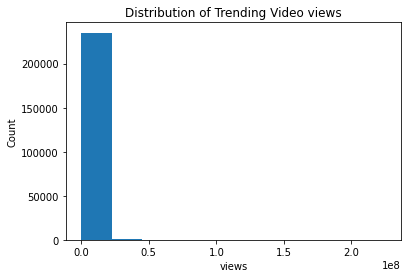

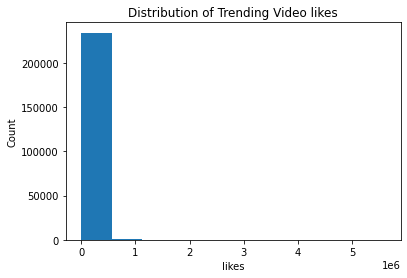

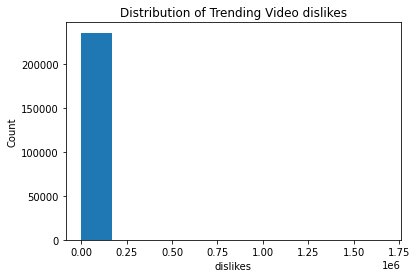

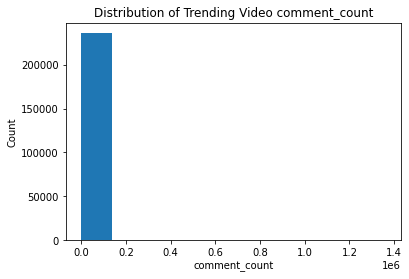

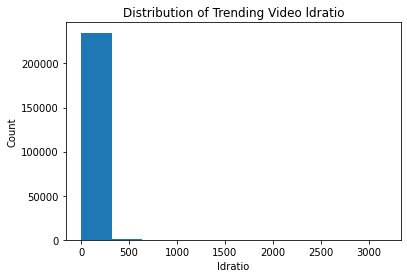

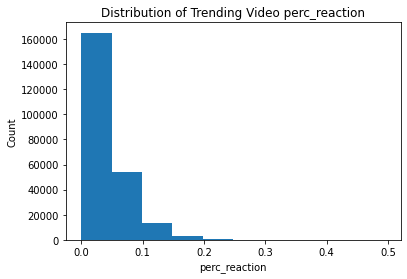

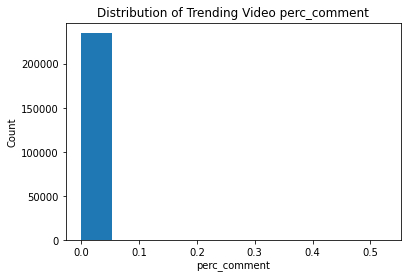

In [6]:


def distribution_cont(youtube, var):
    plt.hist(youtube[youtube["dislikes"] != 0][var])
    plt.xlabel(f"{var}")
    plt.ylabel("Count")
    plt.title(f"Distribution of Trending Video {var}")
    plt.show()
for i in ["views", "likes", "dislikes", "comment_count", "ldratio", "perc_reaction", "perc_comment"]:
    distribution_cont(youtube, i)



Correlation Between Variables

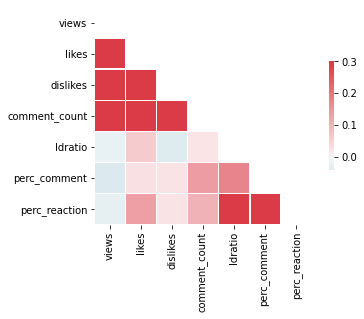

In [0]:
contvars = youtube[["views", "likes", "dislikes", "comment_count", "ldratio", "perc_comment", "perc_reaction"]]
corr = contvars.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Most Frequent Trending Channels

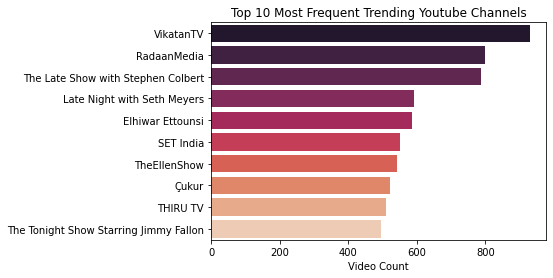

In [0]:


by_channel = youtube.groupby(["channel_title"]).size().sort_values(ascending = False).head(10)
sns.barplot(by_channel.values, by_channel.index.values, palette = "rocket")
plt.title("Top 10 Most Frequent Trending Youtube Channels")
plt.xlabel("Video Count")
plt.show()



In [0]:
youtube.Country.unique()

array(['Cannada', 'French', 'Germany', 'India', 'UnitedKingdom', 'USA'],
      dtype=object)

Most Frequent Trending Categories

In [0]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fc1d411dc80>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a
    :class:`FacetGrid`.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Catego

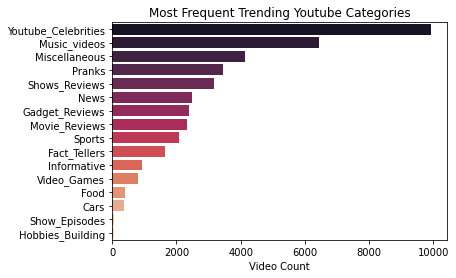

In [7]:
by_cat = youtube[youtube['Country']=='USA'].groupby(["Category"]).size().sort_values(ascending = False)
sns.barplot(by_cat.values, by_cat.index.values, palette = "rocket")
plt.title("Most Frequent Trending Youtube Categories")
plt.xlabel("Video Count")
plt.show()

Top 10 Most Liked Trending Youtube Categories

In [0]:
youtube[(youtube["dislikes"] != 0)& (youtube['Country']=='USA')]

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,Country,Category,like_percentage,popular,ldratio,perc_comment,perc_reaction
200259,200259,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13 17:13:01+00:00,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,USA,Shows_Reviews,95.096953,0,19.395482,0.021318,0.080833
200260,200260,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24.0,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,USA,Youtube_Celebrities,94.052124,1,15.812724,0.005252,0.042720
200261,200261,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,USA,Pranks,96.472928,1,27.352126,0.002563,0.047431
200262,200262,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24.0,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,USA,Youtube_Celebrities,93.854955,0,15.273273,0.006253,0.031582
200263,200263,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,USA,Youtube_Celebrities,98.518149,1,66.483157,0.008359,0.064046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241115,241115,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15.0,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609.0,38160.0,1385.0,2657.0,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,USA,Informative,96.497661,1,27.552347,0.001576,0.023460
241116,241116,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22.0,2018-05-18 01:00:06+00:00,[none],1064798.0,60008.0,382.0,3936.0,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,USA,Shows_Reviews,99.367445,0,157.089005,0.003696,0.056715
241117,241117,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24.0,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451.0,48068.0,1032.0,3992.0,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,USA,Youtube_Celebrities,97.898167,0,46.577519,0.003743,0.046041
241118,241118,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1.0,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813.0,192957.0,2846.0,13088.0,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,USA,Movie_Reviews,98.546498,1,67.799368,0.002312,0.034589


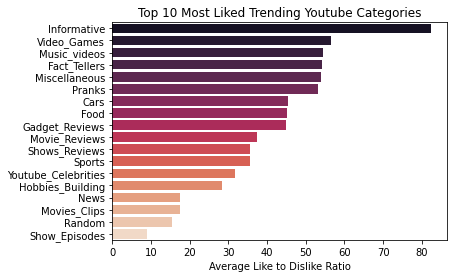

In [0]:
like_category = youtube[youtube["dislikes"] != 0].groupby("Category").mean().sort_values(by = "ldratio", ascending = False)
sns.barplot(like_category["ldratio"], like_category.index.values, palette = "rocket")
plt.title("Top 10 Most Liked Trending Youtube Categories")
plt.xlabel("Average Like to Dislike Ratio")
plt.show()

The Numbers Over Time

In [0]:
def over_time(youtube, var):
    averages = youtube[youtube["dislikes"] != 0].groupby("trending_date").mean()
    plt.plot(averages.index.values, averages[var])
    plt.xticks(rotation = 90)
    plt.xlabel("Date")
    plt.ylabel(f"Average {var}")
    plt.title(f"Average {var} Over Time (11/14/17 - 6/14/18)")
    plt.show()

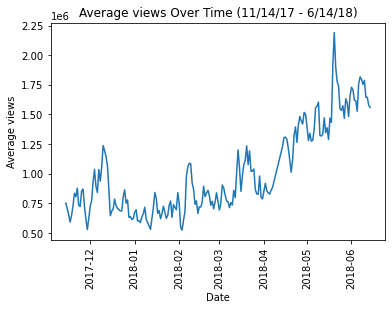

In [0]:
over_time(youtube, "views")

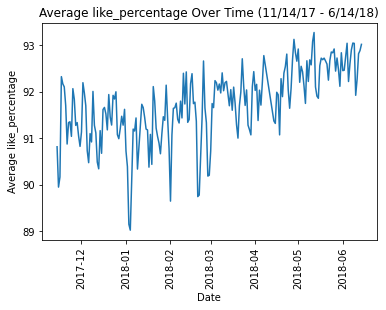

In [0]:
over_time(youtube, "like_percentage")

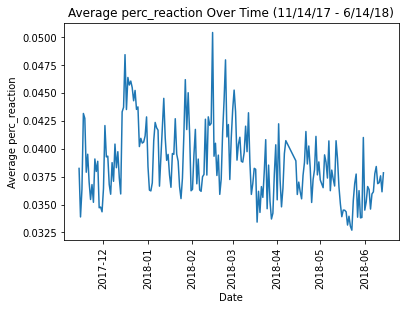

In [0]:
over_time(youtube, "perc_reaction")

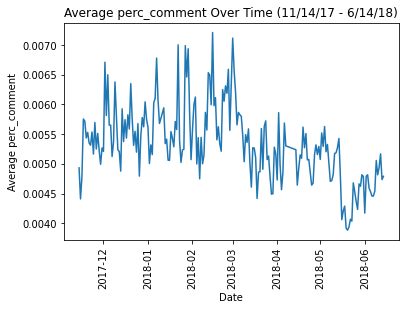

In [0]:
over_time(youtube, "perc_comment")

In [0]:
!pip install streamlit

     |████████████████████████████████| 7.1MB 2.5MB/s 
     |████████████████████████████████| 5.3MB 23.9MB/s 
     |████████████████████████████████| 522kB 48.0MB/s 
     |████████████████████████████████| 112kB 46.7MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 122kB 44.6MB/s 
  Created wheel for validators: filename=validators-0.14.3-cp36-none-any.whl size=17284 sha256=50f6eb00e5b5e4d40777335d59d4e32f4b7b8e6f35f61a5fd8a7286c1927fbd9
  Stored in directory: /root/.cache/pip/wheels/e2/b2/03/20ab3c26e9faacd78dc775bad6157d295539d07e80f2c5de8e
  Created wheel for tornado: filename=tornado-5.1.1-cp36-cp36m-linux_x86_64.whl size=462314 sha256=8d3d3740f3861a1fc25350b146e5714e2fb578727c17e4bd0f50819113cc76c3
  Stored in directory: /root/.cache/pip/wheels/6d/e1/ce/f4ee2fa420cc6b940123c64992b81047816d0a9fad6b879325
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13449 sha256=4c4ea3ece63ddbdf68958be5cd75a95c1fffca54b

In [0]:
# How to run a Dash app in Google Colab

### Install ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-04-19 14:34:06--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.221.126.62, 34.237.57.234, 34.192.111.148, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.221.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  6.66MB/s    in 2.0s    

2020-04-19 14:34:09 (6.66 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('./ngrok http 8501 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://05748c95.ngrok.io


In [0]:
#!streamlit run RDM_visualise.py
!streamlit run Analysis.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.194.130.35:8501

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
NumExpr defaulting to 2 threads.


In [0]:
!pip install chart_studio

In [0]:
import chart_studio.plotly as py
#from plotly.offline import init_notebook_mode, iplot
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as tls


labels = list(youtube.Category.value_counts().index.values)
values = list(youtube.Category.value_counts().values)

trace = go.Pie(labels=labels, values=values)

iplot([trace], filename='basic_pie_chart')